INSTALLING NECESSARY LIBRARIES

In [78]:
%pip install opencv-python-headless
%pip install numpy
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install tensorflow
%pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip3 install 

In [170]:
import os
import sklearn
import time
import pandas as pd
import numpy as np
import glob
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,  Dropout, Flatten, LSTM, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [173]:
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


In [95]:
dataset_path = '/Users/amreshsenathirajah/Desktop/road marking'
train = '/Users/amreshsenathirajah/Desktop/road marking/train/'
val = '/Users/amreshsenathirajah/Desktop/road marking/valid/'
test = '/Users/amreshsenathirajah/Desktop/road marking/test/'

In [96]:
csv_train = '/Users/amreshsenathirajah/Desktop/road marking/train/_annotations.csv'
train_labels_df = pd.read_csv(csv_train)

In [97]:
print(train_labels_df.head())

                                           filename  width  height class  \
0    44_jpg.rf.b65d8d28a451bcdb6919b02ff9e9d34d.jpg    416     416    SA   
1    44_jpg.rf.b65d8d28a451bcdb6919b02ff9e9d34d.jpg    416     416    SA   
2  892a_jpg.rf.b72430b7ebec79ee44477a5058cad825.jpg    416     416    PC   
3  949a_jpg.rf.b50c786cf530731b62baa96cf1a42ad9.jpg    416     416    DM   
4    96_jpg.rf.b7ed5e90f5905907497f56b071db2249.jpg    416     416    PC   

   xmin  ymin  xmax  ymax  
0   210    55   229    89  
1   304    77   356    98  
2   139   239   411   279  
3   197   155   225   163  
4     0    57   351   106  


In [98]:
# Counting the number of instances in each class
class_counts = train_labels_df['class'].value_counts()
print("Train dataset class counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


Train dataset class counts:
SA: 550
DM: 505
PC: 388
RA: 134
SLA: 100
BL: 85
LA: 59
JB: 55
SRA: 45
CL: 38
SL: 38


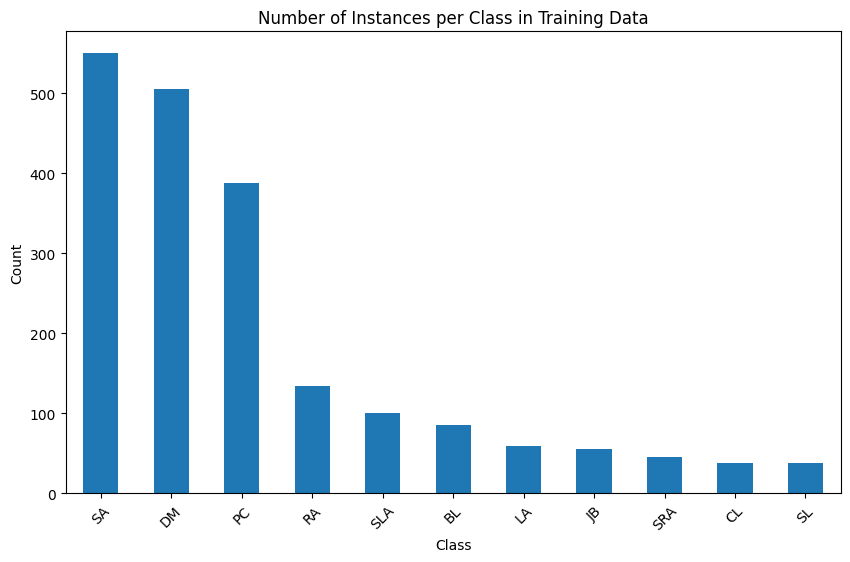

In [99]:
# Plotting bar chart for the number of instances in each class in the train section
class_counts = train_labels_df['class'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Number of Instances per Class in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [100]:
missing_values = train_labels_df.isna().sum()
# Print the number of rows with missing values
num_missing_rows = train_labels_df.isna().any(axis=1).sum()
print(f"\nNumber of rows with missing values: {num_missing_rows}")


Number of rows with missing values: 0


In [109]:
duplicates = train_labels_df[train_labels_df.duplicated(subset=['filename', 'class'], keep=False)]
num_duplicates = duplicates.shape[0]
cleaned_df = train_labels_df.drop_duplicates(subset=['filename', 'class'], keep='first')
cleaned_csv = '/Users/amreshsenathirajah/Desktop/road marking/train/_annotations_cleaned.csv'
cleaned_df.to_csv(cleaned_csv, index=False)
print(f"\nNumber of duplicate rows based on filename and class: {num_duplicates}")
print(f"\nNumber of rows after removing duplicates: {cleaned_df.shape[0]}")


Number of duplicate rows based on filename and class: 688

Number of rows after removing duplicates: 1633


In [101]:
csv_test = '/Users/amreshsenathirajah/Desktop/road marking/test/_annotations.csv'
test_labels_df = pd.read_csv(csv_test)
# Count the number of instances for each class
class_counts = test_labels_df['class'].value_counts()
# Print the counts
print("Test dataset class counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Test dataset class counts:
DM: 30
SA: 28
PC: 20
RA: 15
LA: 8
JB: 8
BL: 5
SLA: 5
SL: 5
CL: 2
SRA: 1


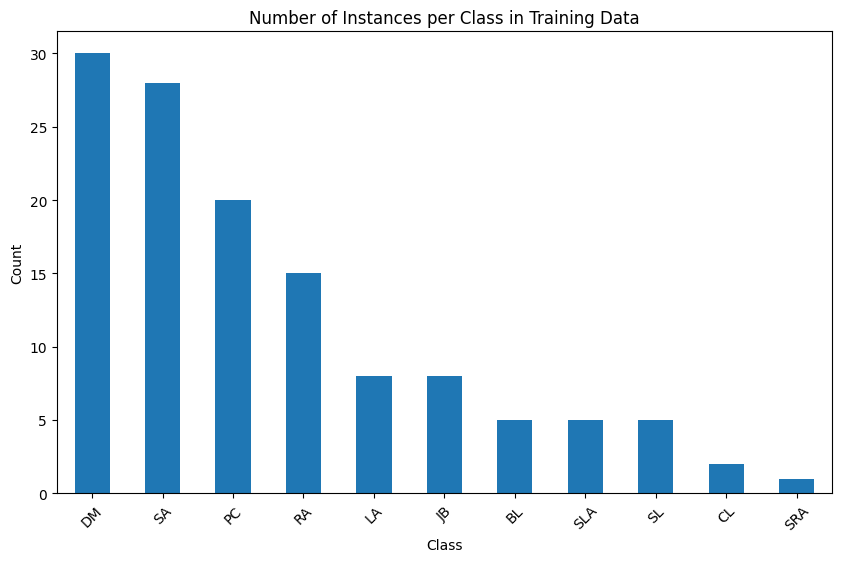

In [103]:
class_counts = test_labels_df['class'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Number of Instances per Class in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [102]:
# Check for missing values
missing_values = test_labels_df.isna().sum()
num_missing_rows = test_labels_df.isna().any(axis=1).sum()
print(f"\nNumber of rows with missing values: {num_missing_rows}")




Number of rows with missing values: 0


In [104]:
duplicates = test_labels_df[test_labels_df.duplicated(subset=['filename', 'class'], keep=False)]
num_duplicates = duplicates.shape[0]
cleaned_df = test_labels_df.drop_duplicates(subset=['filename', 'class'], keep='first')
cleaned_csv = '/Users/amreshsenathirajah/Desktop/road marking/test/_annotations_cleaned.csv'
cleaned_df.to_csv(cleaned_csv, index=False)
print(f"\nNumber of duplicate rows based on 'filename', 'class': {num_duplicates}")
print(f"\nNumber of rows after removing duplicates: {cleaned_df.shape[0]}")


Number of duplicate rows based on 'filename', 'class': 37

Number of rows after removing duplicates: 107


In [106]:
csv_valid = '/Users/amreshsenathirajah/Desktop/road marking/valid/_annotations.csv'
valid_labels_df = pd.read_csv(csv_valid)
class_counts = valid_labels_df['class'].value_counts()
print("valid dataset class counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

valid dataset class counts:
SA: 81
DM: 49
PC: 45
RA: 19
SLA: 12
JB: 11
LA: 10
BL: 7
SL: 6
SRA: 4
CL: 3


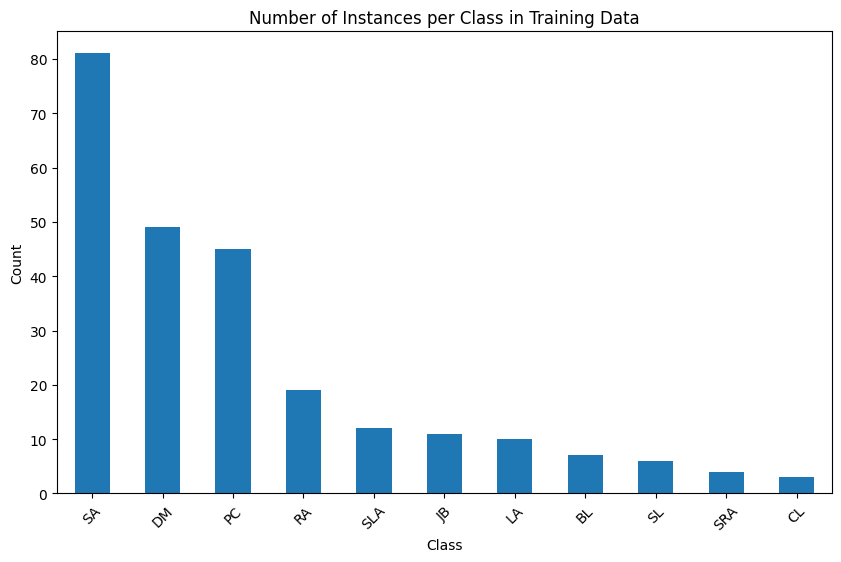

In [107]:
class_counts = valid_labels_df['class'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Number of Instances per Class in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
missing_values = valid_labels_df.isna().sum()

# Print the number of rows with missing values
num_missing_rows = valid_labels_df.isna().any(axis=1).sum()
print(f"\nNumber of rows with missing values: {num_missing_rows}")


Number of rows with missing values: 0


In [110]:
duplicates = valid_labels_df[valid_labels_df.duplicated(subset=['filename', 'class'], keep=False)]
num_duplicates = duplicates.shape[0]
cleaned_df = valid_labels_df.drop_duplicates(subset=['filename', 'class'], keep='first')
cleaned_csv = '/Users/amreshsenathirajah/Desktop/road marking/train/_annotations_cleaned.csv'
cleaned_df.to_csv(cleaned_csv, index=False)
print(f"\nNumber of duplicate rows based on filename and class: {num_duplicates}")
print(f"\nNumber of rows after removing duplicates: {cleaned_df.shape[0]}")


Number of duplicate rows based on filename and class: 71

Number of rows after removing duplicates: 210


Bounding Box for class 'PC': (xmin: 108, ymin: 119, xmax: 321, ymax: 146)
Image shape: (416, 416, 3)


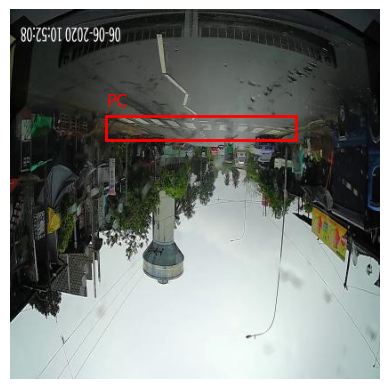

array([[[ 24,  32,  35],
        [ 25,  33,  36],
        [ 27,  35,  38],
        ...,
        [ 28,  32,  35],
        [ 28,  32,  35],
        [ 28,  32,  35]],

       [[ 23,  31,  34],
        [ 25,  33,  36],
        [ 27,  35,  38],
        ...,
        [ 28,  32,  35],
        [ 28,  32,  35],
        [ 28,  32,  35]],

       [[ 23,  31,  33],
        [ 25,  33,  35],
        [ 27,  35,  37],
        ...,
        [ 28,  32,  35],
        [ 28,  32,  35],
        [ 28,  32,  35]],

       ...,

       [[179, 199, 197],
        [179, 199, 197],
        [180, 200, 198],
        ...,
        [155, 182, 177],
        [154, 181, 176],
        [153, 180, 175]],

       [[179, 199, 197],
        [179, 199, 197],
        [180, 200, 198],
        ...,
        [154, 181, 176],
        [153, 180, 175],
        [153, 180, 175]],

       [[179, 199, 197],
        [179, 199, 197],
        [180, 200, 198],
        ...,
        [154, 181, 176],
        [153, 180, 175],
        [153, 180, 175]]

In [111]:

def road_mark_image(direct, train_labels_df):
    # Selects a random row from the DataFrame to get a random image
    random_row = train_labels_df.sample(1).iloc[0]
    filename = random_row['filename']
    
    # Filter all rows for the selected filename
    selected_rows = train_labels_df[train_labels_df['filename'] == filename]
    image_path = os.path.join(direct , filename)
    
    
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    
    # bounding box
    ax = plt.gca()
    for _, row in selected_rows.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        class_name = row['class']
        print(f"Bounding Box for class '{class_name}': (xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax})")
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin - 10, f'{class_name}', fontsize=12, color='r')  # Add class label text

    print(f"Image shape: {img.shape}")

    plt.show()

    return img



road_mark_image(train, train_labels_df )


In [112]:

def load_dataset(dataset_path, split):
    pattern = os.path.join(dataset_path, split, '_annotations.csv')
    #pattern = os.path.join(dataset_path, split, f'{split}_annotations_new.csv')
    annotation_files = glob.glob(pattern)

    if not annotation_files:
        raise FileNotFoundError(f"No CSV file found for {split} split at {pattern}")

    annotation_file = annotation_files[0]
    df = pd.read_csv(annotation_file)
    images = []
    labels = []

    for index, row in df.iterrows():
        img_path = os.path.join(dataset_path, split, row['filename'])
        label = row['class']
        
        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (299, 299))  
        img = img / 255.0  
        
        images.append(img)
        labels.append(label)

    le = LabelEncoder()
    labels = le.fit_transform(labels)
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

In [22]:

train_images, train_labels = load_dataset(dataset_path, 'train')

val_images, val_labels = load_dataset(dataset_path, 'valid')

test_images , test_labels  = load_dataset(dataset_path, 'test')

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)
datagen.fit(train_images)

In [53]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [166]:
from sklearn.metrics import precision_score, recall_score, f1_score
cnn_4 = models.Sequential()
cnn_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)))
cnn_4.add(layers.MaxPooling2D((2, 2)))
cnn_4.add(layers.Flatten())
cnn_4.add(layers.Dense(11, activation='softmax'))

#cnn_4.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
cnn_4.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_4.summary()


# Training the model
cnn_4_history = cnn_4.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(val_images, val_labels),
    batch_size=32
)

test_loss, test_accuracy = cnn_4.evaluate(test_images, test_labels)

print(f'Test Loss cnn4: {test_loss}')
print(f'Test Accuracy cnn4: {test_accuracy}')


# Predict the classes for the test set
test_predictions = cnn_4.predict(test_images)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Calculate inference time
start_time = time.time()
cnn_4.predict(test_images)  # Run inference
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for CNN 4: {inference_time:.4f} seconds')



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 700928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 11)             │     7,710,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,711,115 (29.42 MB)

 Trainable params: 7,711,115 (29.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - accuracy: 0.2198 - loss: 18.5960 - val_accuracy: 0.4291 - val_loss: 1.7518
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/step - accuracy: 0.5660 - loss: 1.3862 - val_accuracy: 0.4899 - val_loss: 1.6153
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - accuracy: 0.7407 - loss: 0.7653 - val_accuracy: 0.5020 - val_loss: 1.6099
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.7625 - loss: 0.6608 - val_accuracy: 0.5223 - val_loss: 1.7141
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - accuracy: 0.7700 - loss: 0.6238 - val_accuracy: 0.5466 - val_loss: 1.4145
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - accuracy: 0.7807 - loss: 0.6071 - val_accuracy: 0.5061 - val_loss: 1.4563
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.7465 - loss: 0.6535 - val_accuracy: 0.5587 - val_loss: 1.6065
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.7575 - loss: 0.5889 - val_acc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Inference time for CNN 4: 0.2815 seconds


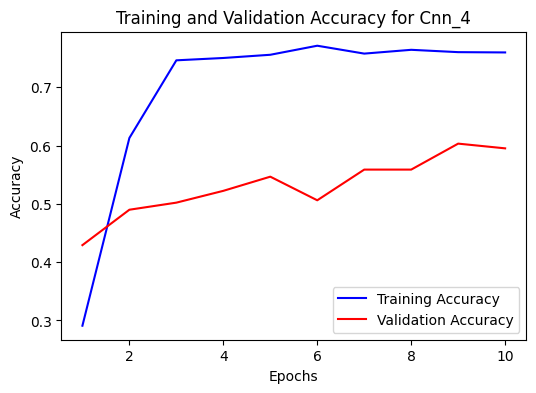

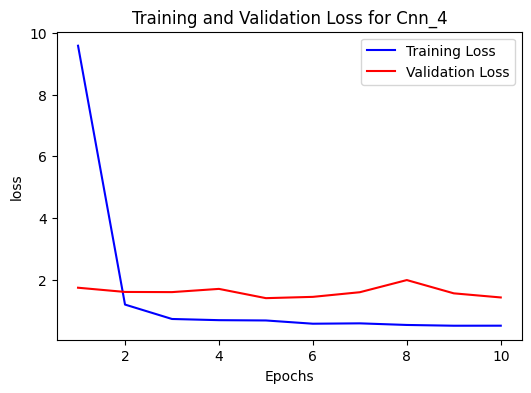

In [167]:
epochs = range(1, len(cnn_4_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, cnn_4_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, cnn_4_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Cnn_4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


epochs = range(1, len(cnn_4_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, cnn_4_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, cnn_4_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for Cnn_4')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [114]:
csv_test = '/Users/amreshsenathirajah/Desktop/road marking/test/_annotations.csv'
test_labels_df = pd.read_csv(csv_test)
unique_classes = test_labels_df['class'].unique()
class_mapping = {i: cls for i, cls in enumerate(unique_classes)}

print("Class Mapping:")
for class_id, class_name in class_mapping.items():
    print(f"Class {class_id}: {class_name}")


Class Mapping:
Class 0: LA
Class 1: RA
Class 2: DM
Class 3: CL
Class 4: PC
Class 5: SA
Class 6: BL
Class 7: SLA
Class 8: JB
Class 9: SL
Class 10: SRA


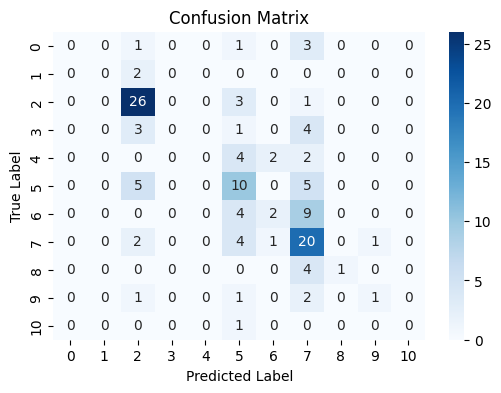

In [174]:
#confusion matrix
cm = confusion_matrix(test_labels, test_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# cnn 5 layers


In [157]:

cnn_5 = models.Sequential()
cnn_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)))
cnn_5.add(layers.MaxPooling2D((2, 2)))
cnn_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_5.add(layers.Flatten())
cnn_5.add(layers.Dense(11, activation='softmax'))

#cnn_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_5.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_5.summary()
# Training the model
cnn_5_history = cnn_5.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(val_images, val_labels)
)
test_loss_cnn5, test_accuracy_cnn5 = cnn_5.evaluate(test_images, test_labels)

print(f'Test Loss cnn5: {test_loss_cnn5}')
print(f'Test Accuracy cnn5: {test_accuracy_cnn5}')

test_predictions = cnn_5.predict(test_images)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



# Calculate inference time
start_time = time.time()
cnn_5.predict(test_images) 
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for CNN 5: {inference_time:.4f} seconds')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 1364224)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 11)             │    15,006,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,025,867 (57.32 MB)

 Trainable params: 15,025,867 (57.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 523ms/step - accuracy: 0.2544 - loss: 24.9599 - val_accuracy: 0.4858 - val_loss: 1.7583
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 505ms/step - accuracy: 0.5436 - loss: 1.3445 - val_accuracy: 0.5506 - val_loss: 1.3665
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 512ms/step - accuracy: 0.7129 - loss: 0.8212 - val_accuracy: 0.5142 - val_loss: 1.6458
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 500ms/step - accuracy: 0.7693 - loss: 0.6052 - val_accuracy: 0.5182 - val_loss: 1.6655
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 493ms/step - accuracy: 0.8163 - loss: 0.5387 - val_accuracy: 0.5385 - val_loss: 1.5637
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.3407 - loss: 2.0975
Test Loss cnn5: 2.1852431297302246
Test Accuracy cnn5: 0.34645670652389526
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
Precision: 0.3260951717644631
Recall: 0.3464566929133858
F1 Score: 0.3070571098771759


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
Inference time for CNN 5: 0.6302 seconds


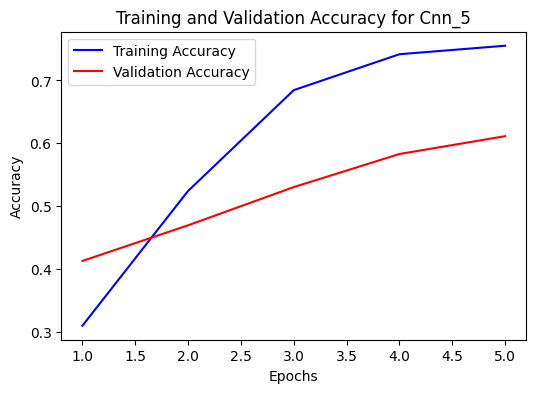

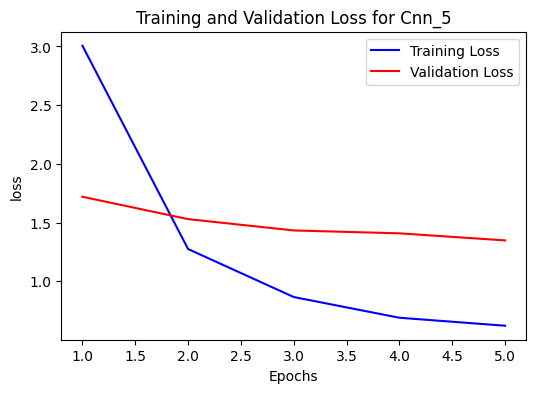

In [142]:
epochs = range(1, len(cnn_5_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, cnn_5_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, cnn_5_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Cnn_5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


epochs = range(1, len(cnn_5_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, cnn_5_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, cnn_5_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for Cnn_5')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# cnn with 6 layers

In [158]:
# 6 layers
cnn_6 = models.Sequential()
cnn_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)))
cnn_6.add(layers.MaxPooling2D((2, 2)))
cnn_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_6.add(layers.MaxPooling2D((2, 2)))
cnn_6.add(layers.Flatten())
cnn_6.add(layers.Dense(11, activation='softmax'))

cnn_6.summary()

# cnn_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


cnn_6_history = cnn_6.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(val_images, val_labels)
)
test_loss_cnn6, test_accuracy_cnn6 = cnn_6.evaluate(test_images, test_labels)

print(f'Test Loss cnn6: {test_loss_cnn6}')
print(f'Test Accuracy cnn6: {test_accuracy_cnn6}')

test_predictions = cnn_6.predict(test_images)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Calculate inference time
start_time = time.time()
cnn_6.predict(test_images)  
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for CNN 6: {inference_time:.4f} seconds')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 341056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 11)             │     3,751,627 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,771,019 (14.39 MB)

 Trainable params: 3,771,019 (14.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 504ms/step - accuracy: 0.2784 - loss: 3.4908 - val_accuracy: 0.4615 - val_loss: 1.7284
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.5645 - loss: 1.2596 - val_accuracy: 0.5304 - val_loss: 1.3887
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 497ms/step - accuracy: 0.7143 - loss: 0.8305 - val_accuracy: 0.5020 - val_loss: 1.5077
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 488ms/step - accuracy: 0.7745 - loss: 0.6773 - val_accuracy: 0.5951 - val_loss: 1.2862
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 497ms/step - accuracy: 0.7645 - loss: 0.6517 - val_accuracy: 0.5789 - val_loss: 1.4682
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3271 - loss: 1.9358
Test Loss cnn6: 2.0844385623931885
Test Accuracy cnn6: 0.35433071851730347
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
Precision: 0.40431877833452634
Recall: 0.3543307086614173
F1 Score: 0.32679164092342705
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Inference time for CNN 6: 0.5360 seconds


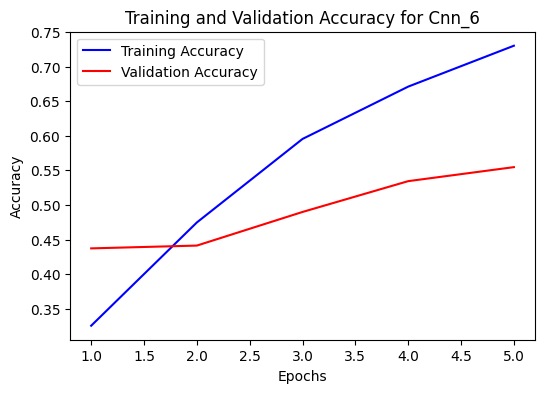

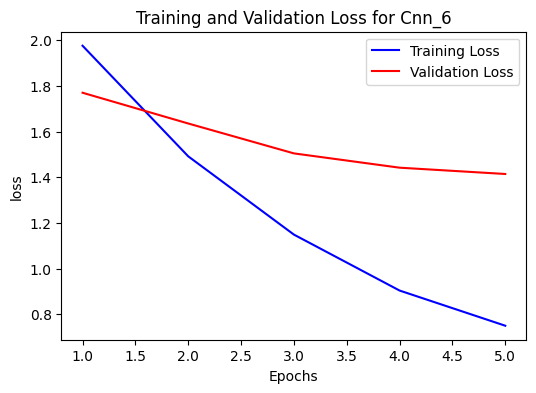

In [144]:
epochs = range(1, len(cnn_6_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, cnn_6_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, cnn_6_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Cnn_6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


epochs = range(1, len(cnn_6_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, cnn_6_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, cnn_6_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for Cnn_6')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()




# lstm 4 layers

In [62]:
# Define the reshape function using TensorFlow's reshape
def reshape(images):
    return tf.reshape(images, (images.shape[0], images.shape[1], -1))


train_images_reshaped = reshape(train_images)
val_images_reshaped = reshape(val_images)
test_images_reshaped = reshape(test_images)

print(train_images_reshaped.shape)
print(val_images_reshaped.shape)
print(test_images_reshaped.shape)




(1997, 299, 897)
(247, 299, 897)
(127, 299, 897)


In [159]:
lstm_4 = Sequential()
lstm_4.add(LSTM(100, activation='tanh', input_shape=(train_images_reshaped.shape[1], train_images_reshaped.shape[2])))
lstm_4.add(Dense(128, activation='relu'))
lstm_4.add(Dropout(0.5))
lstm_4.add(Dense(11, activation='softmax'))  # Assuming 11 classes


lstm_4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

lstm_4.summary()

# Training the LSTM model
lstm_4_history = lstm_4.fit(
    train_images_reshaped, train_labels,
    batch_size = 32,
    epochs=5,
    validation_data=(val_images_reshaped, val_labels)
)

# Evaluating the LSTM model
test_loss_lstm4, test_accuracy_lstm4 = lstm_4.evaluate(test_images_reshaped, test_labels)
print(f'Test Loss lstm4: {test_loss_lstm4}')
print(f'Test Accuracy lstm4: {test_accuracy_lstm4}')


test_predictions = lstm_4.predict(test_images_reshaped)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

start_time = time.time()
lstm_4.predict(test_images_reshaped)  # Run inference
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for LSTM 4: {inference_time:.4f} seconds')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 100)            │       399,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413,547 (1.58 MB)

 Trainable params: 413,547 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 283ms/step - accuracy: 0.2513 - loss: 2.0877 - val_accuracy: 0.3968 - val_loss: 1.8729
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - accuracy: 0.2746 - loss: 1.9677 - val_accuracy: 0.4211 - val_loss: 1.7994
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.3134 - loss: 1.9293 - val_accuracy: 0.4170 - val_loss: 1.7839
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.3108 - loss: 1.9090 - val_accuracy: 0.4251 - val_loss: 1.7526
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.3064 - loss: 1.9007 - val_accuracy: 0.4251 - val_loss: 1.7517
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2403 - loss: 1.8933
Test Loss lstm4: 1.9521772861480713
Test Accuracy lstm4: 0.24409449100494385
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
Precision: 0.1668797374020651
Recall: 0.2440944881889764
F1 Score: 0.19017752132628266
2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step 
Inference time for LSTM 4: 0.3535 seconds


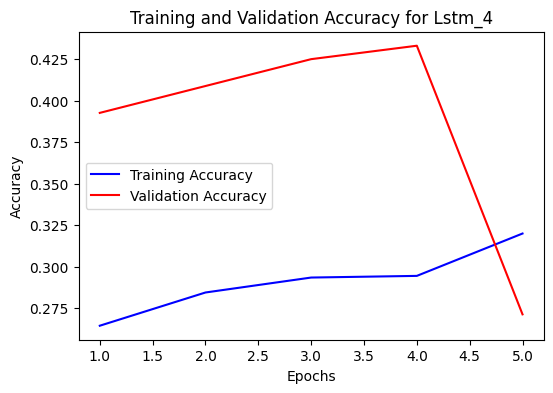

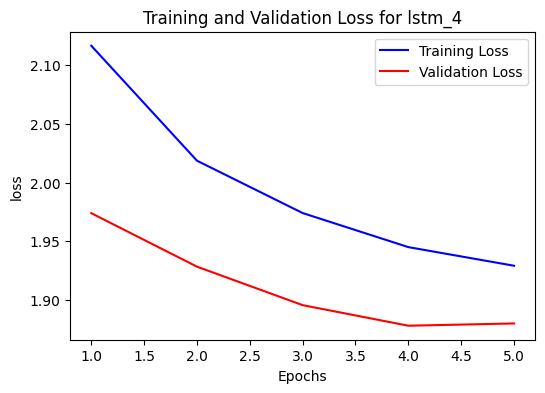

In [146]:
epochs = range(1, len(lstm_4_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, lstm_4_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, lstm_4_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Lstm_4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

epochs = range(1, len(lstm_4_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, lstm_4_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, lstm_4_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for lstm_4')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [160]:

lstm_5 = Sequential()
lstm_5.add(LSTM(100, activation='tanh', input_shape=(train_images_reshaped.shape[1], train_images_reshaped.shape[2])))
lstm_5.add(Dense(128, activation='relu'))
lstm_5.add(Dense(64, activation='relu'))
lstm_5.add(Dropout(0.5))
lstm_5.add(Dense(11, activation='softmax'))

# lstm_5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_5.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_5.summary()


lstm_5_history = lstm_5.fit(
    train_images_reshaped, train_labels,
    batch_size = 32,
    epochs=5,
    validation_data=(val_images_reshaped, val_labels)
)


test_loss_lstm5, test_accuracy_lstm5 = lstm_5.evaluate(test_images_reshaped, test_labels)
print(f'Test Loss lstm5: {test_loss_lstm5}')
print(f'Test Accuracy lstm5: {test_accuracy_lstm5}')


test_predictions = lstm_5.predict(test_images_reshaped)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

start_time = time.time()
lstm_5.predict(test_images_reshaped)  # Run inference
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for LSTM 5: {inference_time:.4f} seconds')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100)            │       399,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,099 (1.61 MB)

 Trainable params: 421,099 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - accuracy: 0.2122 - loss: 2.1886 - val_accuracy: 0.3684 - val_loss: 1.9157
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - accuracy: 0.2758 - loss: 2.0477 - val_accuracy: 0.3563 - val_loss: 1.8372
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.3046 - loss: 1.9960 - val_accuracy: 0.3968 - val_loss: 1.7981
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step - accuracy: 0.3134 - loss: 1.9340 - val_accuracy: 0.4008 - val_loss: 1.7820
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.3145 - loss: 1.9532 - val_accuracy: 0.4130 - val_loss: 1.7522
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2487 - loss: 1.8939
Test Loss lstm5: 1.9459387063980103
Test Accuracy lstm5: 0.24409449100494385
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
Precision: 0.16486027481858886
Recall: 0.2440944881889764
F1 Score: 0.18251341369939375
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Inference time for LSTM 5: 0.2497 seconds


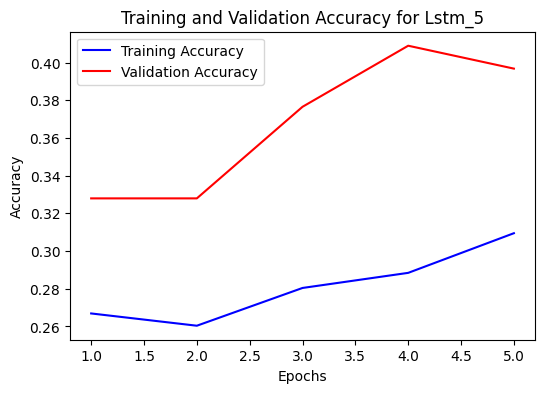

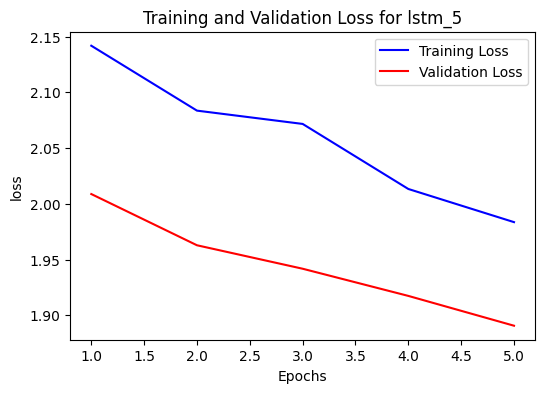

In [147]:
epochs = range(1, len(lstm_5_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, lstm_5_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, lstm_5_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Lstm_5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

epochs = range(1, len(lstm_5_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, lstm_5_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, lstm_5_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for lstm_5')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [161]:

lstm_6 = Sequential()
lstm_6.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(train_images_reshaped.shape[1], train_images_reshaped.shape[2])))
lstm_6.add(LSTM(100, activation='tanh'))
lstm_6.add(Dense(128, activation='relu'))
lstm_6.add(Dropout(0.5))
lstm_6.add(Flatten())
lstm_6.add(Dense(11, activation='softmax'))


# lstm_6.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_6.summary()

lstm_6_history = lstm_6.fit(
    train_images_reshaped, train_labels,
    batch_size = 32,
    epochs=5,
    validation_data=(val_images_reshaped, val_labels)
)

# Evaluating the LSTM model
test_loss_lstm6, test_accuracy_lstm6 = lstm_6.evaluate(test_images_reshaped, test_labels)
print(f'Test Loss lstm6: {test_loss_lstm6}')
print(f'Test Accuracy lstm6: {test_accuracy_lstm6}')



test_predictions = lstm_6.predict(test_images_reshaped)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

start_time = time.time()
lstm_6.predict(test_images_reshaped)  # Run inference
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for LSTM 6: {inference_time:.4f} seconds')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 299, 100)       │       399,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 493,947 (1.88 MB)

 Trainable params: 493,947 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 404ms/step - accuracy: 0.2315 - loss: 2.0892 - val_accuracy: 0.3806 - val_loss: 1.8923
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 419ms/step - accuracy: 0.2810 - loss: 1.9800 - val_accuracy: 0.3603 - val_loss: 1.8539
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 428ms/step - accuracy: 0.2933 - loss: 1.9564 - val_accuracy: 0.3968 - val_loss: 1.8222
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 423ms/step - accuracy: 0.3037 - loss: 1.9401 - val_accuracy: 0.4049 - val_loss: 1.7996
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 442ms/step - accuracy: 0.3059 - loss: 1.9157 - val_accuracy: 0.4372 - val_loss: 1.7731
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2131 - loss: 1.9497
Test Loss lstm6: 2.005054235458374
Test Accuracy lstm6: 0.20472441613674164
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
Precision: 0.17509252434000766
Recall: 0.2047244094488189
F1 Score: 0.15797505661913774
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Inference time for LSTM 6: 0.4684 seconds


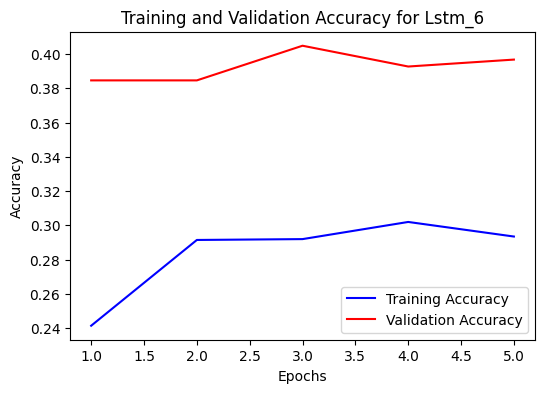

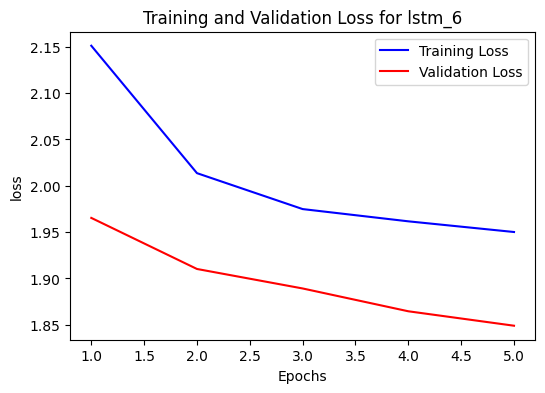

In [148]:
epochs = range(1, len(lstm_6_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, lstm_6_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, lstm_6_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Lstm_6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


epochs = range(1, len(lstm_6_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, lstm_6_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, lstm_6_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for lstm_6')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# rnn 

In [162]:
rnn_4 = Sequential()
rnn_4.add(SimpleRNN(64, activation='tanh', input_shape=(train_images_reshaped.shape[1], train_images_reshaped.shape[2])))
rnn_4.add(Dense(128, activation='relu'))
rnn_4.add(Dropout(0.3))
rnn_4.add(Dense(11, activation='softmax'))

# rnn_4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_4.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_4.summary()


rnn_4_history = rnn_4.fit(
    train_images_reshaped, train_labels,
    batch_size = 32,
    epochs=5,
    validation_data=(val_images_reshaped, val_labels)
)


test_loss_rnn4, test_accuracy_rnn4 = rnn_4.evaluate(test_images_reshaped, test_labels)
print(f'Test Loss rnn4: {test_loss_rnn4}')
print(f'Test Accuracy rnn4: {test_accuracy_rnn4}')



test_predictions = rnn_4.predict(test_images_reshaped)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

start_time = time.time()
rnn_4.predict(test_images_reshaped)  # Run inference
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for RNN 4: {inference_time:.4f} seconds')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 64)             │        61,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,307 (278.54 KB)

 Trainable params: 71,307 (278.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.2513 - loss: 2.1031 - val_accuracy: 0.2632 - val_loss: 1.8574
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.3159 - loss: 1.9234 - val_accuracy: 0.4251 - val_loss: 1.7921
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.3228 - loss: 1.8976 - val_accuracy: 0.4211 - val_loss: 1.7734
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.3082 - loss: 1.8801 - val_accuracy: 0.3684 - val_loss: 1.7668
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.3280 - loss: 1.8712 - val_accuracy: 0.4170 - val_loss: 1.7430
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2058 - loss: 1.8683
Test Loss rnn4: 1.9296809434890747
Test Accuracy rnn4: 0.20472441613674164
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Precision: 0.13590963614122484
Recall: 0.2047244094488189
F1 Score: 0.15577180210964195
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Inference time for RNN 4: 0.1669 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


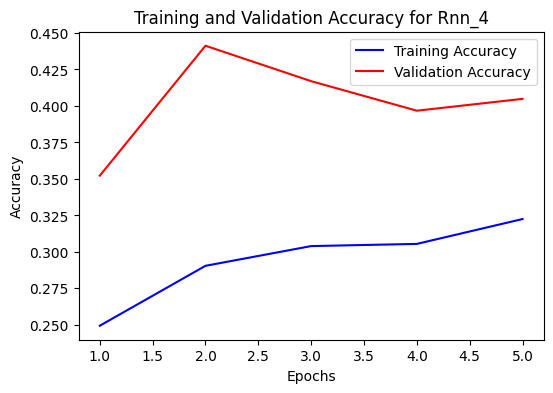

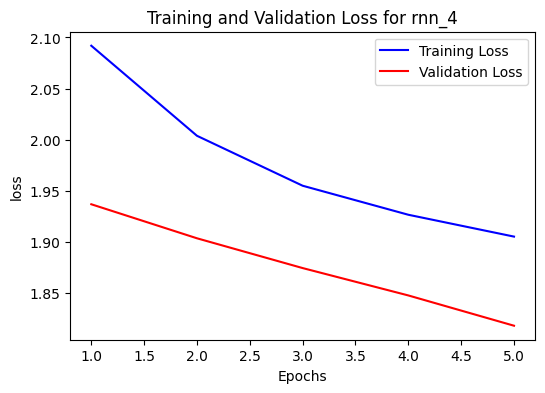

In [149]:
epochs = range(1, len(rnn_4_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, rnn_4_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, rnn_4_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Rnn_4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


epochs = range(1, len(rnn_4_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, rnn_4_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, rnn_4_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for rnn_4')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [163]:

rnn_5 = Sequential()
rnn_5.add(SimpleRNN(100, activation='tanh', input_shape=(train_images_reshaped.shape[1], train_images_reshaped.shape[2])))
rnn_5.add(Dense(128, activation='relu'))
rnn_5.add(Dense(64, activation='relu'))
rnn_5.add(Dropout(0.5))
rnn_5.add(Dense(12, activation='softmax'))

# rnn_5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_5.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_5.summary()



rnn_5_history = rnn_5.fit(
    train_images_reshaped, train_labels,
    batch_size = 32,
    epochs=5,
    validation_data=(val_images_reshaped, val_labels)
)


test_loss_rnn5, test_accuracy_rnn5 = rnn_5.evaluate(test_images_reshaped, test_labels)
print(f'Test Loss rnn5: {test_loss_rnn5}')
print(f'Test Accuracy rnn5: {test_accuracy_rnn5}')


test_predictions = rnn_5.predict(test_images_reshaped)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

start_time = time.time()
rnn_5.predict(test_images_reshaped)  # Run inference
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for RNN 5: {inference_time:.4f} seconds')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 100)            │        99,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,764 (475.64 KB)

 Trainable params: 121,764 (475.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.2161 - loss: 2.1963 - val_accuracy: 0.2591 - val_loss: 1.9443
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.2795 - loss: 2.0496 - val_accuracy: 0.3927 - val_loss: 1.8571
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.2737 - loss: 2.0247 - val_accuracy: 0.4049 - val_loss: 1.8135
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.3003 - loss: 1.9580 - val_accuracy: 0.4332 - val_loss: 1.8036
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.3126 - loss: 1.9483 - val_accuracy: 0.3968 - val_loss: 1.7739
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2173 - loss: 1.9233
Test Loss rnn5: 1.9946465492248535
Test Accuracy rnn5: 0.20472441613674164
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Precision: 0.0784411442240606
Recall: 0.2047244094488189
F1 Score: 0.11327501049724474
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Inference time for RNN 5: 0.1774 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


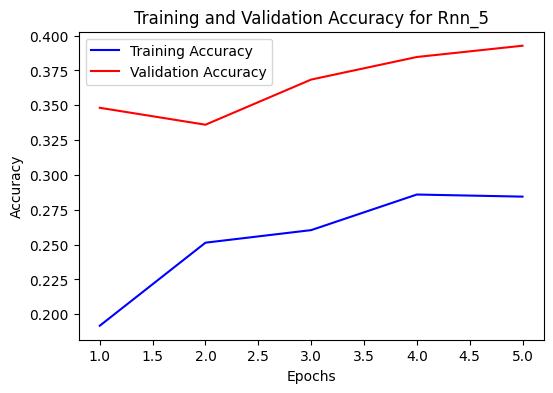

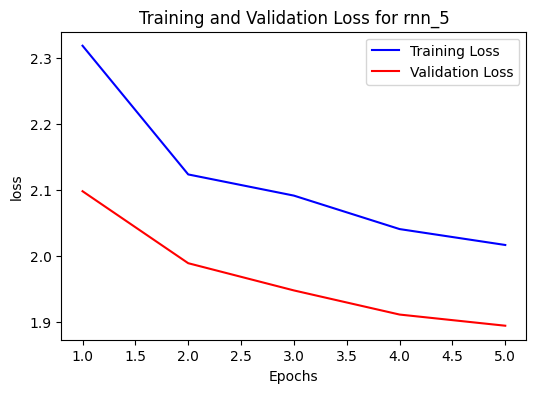

In [151]:
epochs = range(1, len(rnn_5_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, rnn_5_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, rnn_5_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Rnn_5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


epochs = range(1, len(rnn_5_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, rnn_5_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, rnn_5_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for rnn_5')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [165]:
rnn_6 = Sequential()
rnn_6.add(SimpleRNN(100, activation='tanh', return_sequences=True, input_shape=(train_images_reshaped.shape[1], train_images_reshaped.shape[2])))
rnn_6.add(SimpleRNN(100, activation='tanh', return_sequences=True))
rnn_6.add(Dense(128, activation='relu'))
rnn_6.add(Dropout(0.5))
rnn_6.add(Flatten())
rnn_6.add(Dense(12, activation='softmax'))

# rnn_10.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_6.summary()




rnn_6_history = rnn_5.fit(
    train_images_reshaped, train_labels,
    batch_size = 32,
    epochs=5,
    validation_data=(val_images_reshaped, val_labels)
)


test_loss_rnn6, test_accuracy_rnn6 = rnn_6.evaluate(test_images_reshaped, test_labels)
print(f'Test Loss rnn6: {test_loss_rnn6}')
print(f'Test Accuracy rnn6: {test_accuracy_rnn6}')



test_predictions = rnn_6.predict(test_images_reshaped)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, F1 score
precision = precision_score(test_labels, test_pred_classes, average='weighted')
recall = recall_score(test_labels, test_pred_classes, average='weighted')
f1 = f1_score(test_labels, test_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

start_time = time.time()
rnn_6.predict(test_images_reshaped)  # Run inference
end_time = time.time()
inference_time = end_time - start_time

print(f'Inference time for RNN 6: {inference_time:.4f} seconds')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 299, 100)       │        99,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 299, 100)       │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 299, 128)       │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 299, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 38272)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 12)             │       459,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,104 (2.26 MB)

 Trainable params: 592,104 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.3291 - loss: 1.8554 - val_accuracy: 0.4008 - val_loss: 1.7583
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.3107 - loss: 1.8689 - val_accuracy: 0.4332 - val_loss: 1.7255
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.3050 - loss: 1.8873 - val_accuracy: 0.4413 - val_loss: 1.7164
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.3230 - loss: 1.8501 - val_accuracy: 0.4413 - val_loss: 1.7208
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.3409 - loss: 1.8352 - val_accuracy: 0.4494 - val_loss: 1.7234
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1860 - loss: 2.3856
Test Loss rnn6: 2.387787342071533
Test Accuracy rnn6: 0.17322835326194763
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Precision: 0.09091886769967708
Recall: 0.1732283464566929
F1 Score: 0.11560858903199898
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Inference time for RNN 6: 0.2416 seconds


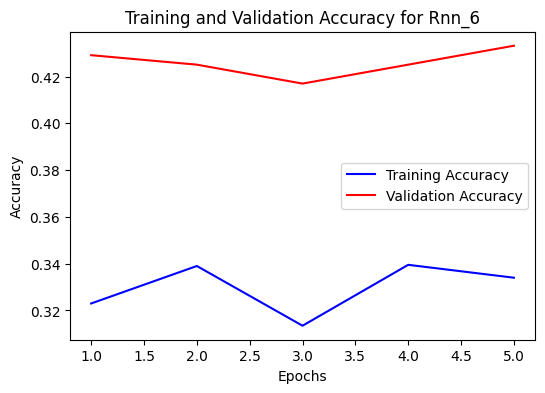

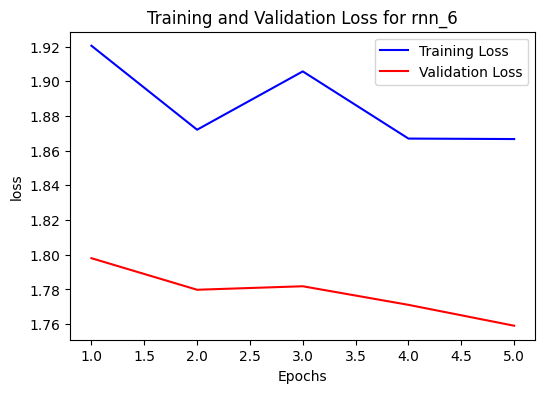

In [153]:
epochs = range(1, len(rnn_6_history.history['accuracy']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, rnn_6_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, rnn_6_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Rnn_6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


epochs = range(1, len(rnn_6_history.history['loss']) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, rnn_6_history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, rnn_6_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss for rnn_6')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()